In [2]:
import numpy as np
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD, Adagrad
from keras.utils.np_utils import to_categorical 
from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau,CSVLogger, EarlyStopping, ModelCheckpoint
from keras import losses
import matplotlib.pyplot as plt
import pandas as pd
import pylab
%matplotlib inline

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
batch_size = 128
num_classes= 10
num_epochs = 20

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
#Normalization
mean = np.mean(X_train)
std_dev = np.std(X_train)
X_train = (X_train - mean)/(std_dev+1e-7)
X_test = (X_test - mean)/(std_dev+1e-7)

In [10]:
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [11]:
#Base Model
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [14]:
#Activation = relu
csv_logger = CSVLogger('model_relu.csv')
model_checkpoint = ModelCheckpoint('model_relu.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [15]:
history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])


/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.3699 - acc: 0.8861 - val_loss: 0.1443 - val_acc: 0.9561

Epoch 00001: val_loss improved from inf to 0.14432, saving model to model_relu_1.hdf5
Epoch 2/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1894 - acc: 0.9432 - val_loss: 0.1103 - val_acc: 0.9667

Epoch 00002: val_loss improved from 0.14432 to 0.11033, saving model to model_relu_1.hdf5
Epoch 3/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1492 - acc: 0.9548 - val_loss: 0.0960 - val_acc: 0.9706

Epoch 00003: val_loss improved from 0.11033 to 0.09601, saving model to model_relu_1.hdf5
Epoch 4/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.1292 - acc: 0.9610 - val_loss: 0.0894 - val_acc: 0.9714

Epoch 00004: val_loss improved from 0.09601 to 0.08938, saving model to model_relu_1.hdf5
Epoch 5/20
60000/60000 [==============

In [46]:
score = model.evaluate(X_test, Y_test, verbose = 0)

In [17]:
#Activation = tanh
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_tanh_1.csv')
model_checkpoint = ModelCheckpoint('model_tanh_1.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.3851 - acc: 0.8814 - val_loss: 0.1884 - val_acc: 0.9429

Epoch 00001: val_loss improved from inf to 0.18842, saving model to model_tanh_1.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.2209 - acc: 0.9330 - val_loss: 0.1476 - val_acc: 0.9534

Epoch 00002: val_loss improved from 0.18842 to 0.14764, saving model to model_tanh_1.hdf5
Epoch 3/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.1853 - acc: 0.9426 - val_loss: 0.1262 - val_acc: 0.9614

Epoch 00003: val_loss improved from 0.14764 to 0.12618, saving model to model_tanh_1.hdf5
Epoch 4/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.1621 - acc: 0.9503 - val_loss: 0.1094 - val_acc: 0.9667

Epoch 00004: val_loss improved from 0.12618 to 0.10937, saving model to model_tanh_1.hdf5
Epoch 5/20
60000/60000 [==============

In [16]:
#Activation = sigmoid
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_sigmoid_1.csv')
model_checkpoint = ModelCheckpoint('model_sigmoid_1.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.4691 - acc: 0.8616 - val_loss: 0.2324 - val_acc: 0.9333

Epoch 00001: val_loss improved from inf to 0.23242, saving model to model_sigmoid_1.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.2513 - acc: 0.9269 - val_loss: 0.1717 - val_acc: 0.9506

Epoch 00002: val_loss improved from 0.23242 to 0.17168, saving model to model_sigmoid_1.hdf5
Epoch 3/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.1932 - acc: 0.9437 - val_loss: 0.1393 - val_acc: 0.9590

Epoch 00003: val_loss improved from 0.17168 to 0.13926, saving model to model_sigmoid_1.hdf5
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.1612 - acc: 0.9530 - val_loss: 0.1145 - val_acc: 0.9651

Epoch 00004: val_loss improved from 0.13926 to 0.11447, saving model to model_sigmoid_1.hdf5
Epoch 5/20
60000/60000 [==

In [44]:
relu_csv = pd.read_csv('model_relu.csv')
relu_csv

,epoch,acc,loss,val_acc,val_loss
0,0,0.885417,0.374310,0.9549,0.146234
1,1,0.943967,0.186573,0.9681,0.106412
2,2,0.955100,0.149608,0.9726,0.089486
3,3,0.960950,0.127578,0.9759,0.082487
4,4,0.965350,0.113900,0.9771,0.079161
5,5,0.967533,0.106428,0.9781,0.072907
6,6,0.968567,0.100087,0.9802,0.069647
7,7,0.970900,0.092166,0.9789,0.072504
8,8,0.972200,0.087351,0.9789,0.068108
9,9,0.973917,0.082516,0.9822,0.068033


In [45]:
tanh_csv = pd.read_csv('model_tanh.csv')
tanh_csv

,epoch,acc,loss,val_acc,val_loss
0,0,0.881683,0.384171,0.9440,0.193892
1,1,0.932283,0.225717,0.9536,0.150952
2,2,0.942283,0.189575,0.9616,0.126417
3,3,0.948450,0.167659,0.9653,0.118726
4,4,0.954667,0.148508,0.9657,0.114804
5,5,0.956650,0.140146,0.9698,0.100234
6,6,0.958300,0.131139,0.9698,0.098162
7,7,0.960933,0.124428,0.9707,0.095006
8,8,0.963167,0.119504,0.9725,0.090003
9,9,0.962767,0.117385,0.9740,0.085422


In [46]:
sigmoid_csv = pd.read_csv('model_sigmoid.csv')
sigmoid_csv

,epoch,acc,loss,val_acc,val_loss
0,0,0.864450,0.459558,0.9328,0.229060
1,1,0.927400,0.248908,0.9487,0.170290
2,2,0.943900,0.193822,0.9579,0.138683
3,3,0.952967,0.162588,0.9639,0.118834
4,4,0.960283,0.140699,0.9681,0.106735
5,5,0.963550,0.125635,0.9704,0.097360
6,6,0.966917,0.112618,0.9731,0.091166
7,7,0.969817,0.103423,0.9742,0.083219
8,8,0.971433,0.093880,0.9755,0.077677
9,9,0.973800,0.087287,0.9770,0.075570


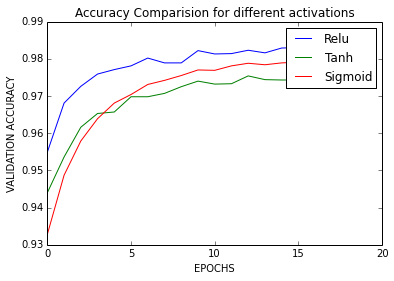

In [52]:
#Accuracy plot for the different activations
pylab.plot(relu_csv['epoch'],relu_csv['val_acc'],label = 'Relu')
pylab.plot(tanh_csv['epoch'], tanh_csv['val_acc'],label = 'Tanh')
pylab.plot(sigmoid_csv['epoch'],sigmoid_csv['val_acc'],label = 'Sigmoid')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("EPOCHS")
pylab.ylabel("VALIDATION ACCURACY")
plt.title('Accuracy Comparision for different activations')
pylab.savefig("Activations_Accuracy")
pylab.show()

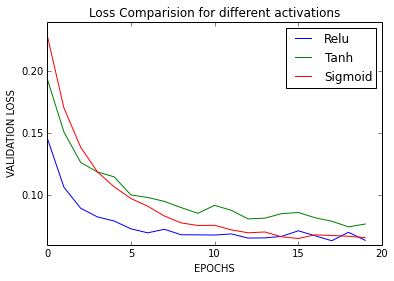

In [53]:
#Loss plot for the different activations
pylab.plot(relu_csv['epoch'],relu_csv['val_loss'],label = 'Relu')
pylab.plot(tanh_csv['epoch'], tanh_csv['val_loss'],label = 'Tanh')
pylab.plot(sigmoid_csv['epoch'],sigmoid_csv['val_loss'],label = 'Sigmoid')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("EPOCHS")
pylab.ylabel("VALIDATION LOSS")
plt.title('Loss Comparision for different activations')
pylab.savefig("Activations_Loss")
pylab.show()

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [21]:
#Adam optimizer learning rate = 0.1
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.1),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_learning_0.1.csv')
model_checkpoint = ModelCheckpoint('model_learning_0.1.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 6.8971 - acc: 0.3774 - val_loss: 5.5874 - val_acc: 0.5222

Epoch 00001: val_loss improved from inf to 5.58743, saving model to model_learning_0.1.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 114us/step - loss: 5.9613 - acc: 0.4417 - val_loss: 5.4287 - val_acc: 0.5695

Epoch 00002: val_loss improved from 5.58743 to 5.42867, saving model to model_learning_0.1.hdf5
Epoch 3/20
60000/60000 [==============================] - 7s 113us/step - loss: 5.9452 - acc: 0.4537 - val_loss: 5.5845 - val_acc: 0.5278

Epoch 00003: val_loss did not improve
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 5.8885 - acc: 0.4670 - val_loss: 5.3969 - val_acc: 0.5882

Epoch 00004: val_loss improved from 5.42867 to 5.39686, saving model to model_learning_0.1.hdf5
Epoch 5/20
60000/60000 [==============================] - 7s 116us/step 

In [22]:
#Adam optimizer learning rate = 0.01
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_learning_0.01.csv')
model_checkpoint = ModelCheckpoint('model_learning_0.01.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.3649 - acc: 0.8896 - val_loss: 0.1680 - val_acc: 0.9478

Epoch 00001: val_loss improved from inf to 0.16803, saving model to model_learning_0.01.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.2588 - acc: 0.9202 - val_loss: 0.1502 - val_acc: 0.9531

Epoch 00002: val_loss improved from 0.16803 to 0.15019, saving model to model_learning_0.01.hdf5
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.2388 - acc: 0.9269 - val_loss: 0.1280 - val_acc: 0.9607

Epoch 00003: val_loss improved from 0.15019 to 0.12797, saving model to model_learning_0.01.hdf5
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.2293 - acc: 0.9295 - val_loss: 0.1260 - val_acc: 0.9608

Epoch 00004: val_loss improved from 0.12797 to 0.12603, saving model to model_learning_0.01.hdf5
Epoch 5/20

In [23]:
#Adam optimizer: Learning rate = 0.001
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_learning_0.001.csv')
model_checkpoint = ModelCheckpoint('model_learning_0.001.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.4694 - acc: 0.8610 - val_loss: 0.2360 - val_acc: 0.9313

Epoch 00001: val_loss improved from inf to 0.23604, saving model to model_learning_0.001.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.2505 - acc: 0.9282 - val_loss: 0.1762 - val_acc: 0.9482

Epoch 00002: val_loss improved from 0.23604 to 0.17615, saving model to model_learning_0.001.hdf5
Epoch 3/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1959 - acc: 0.9427 - val_loss: 0.1379 - val_acc: 0.9580

Epoch 00003: val_loss improved from 0.17615 to 0.13790, saving model to model_learning_0.001.hdf5
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.1627 - acc: 0.9524 - val_loss: 0.1166 - val_acc: 0.9654

Epoch 00004: val_loss improved from 0.13790 to 0.11659, saving model to model_learning_0.001.hdf5
Epoch 

In [25]:
learning_csv_1 = pd.read_csv('model_learning_0.1.csv')
learning_csv_1

,epoch,acc,loss,val_acc,val_loss
0,0,0.377417,6.897138,0.5222,5.587428
1,1,0.441667,5.961269,0.5695,5.428674
2,2,0.453717,5.945160,0.5278,5.584518
3,3,0.467017,5.888494,0.5882,5.396862
4,4,0.467800,5.904178,0.5429,5.542714
5,5,0.480133,5.846046,0.5949,5.370392
6,6,0.494817,5.757173,0.6464,4.093017
7,7,0.535383,4.643341,0.6853,3.661895
8,8,0.567183,4.224998,0.7015,3.601102
9,9,0.574817,4.186354,0.6895,3.641249


In [27]:
learning_csv_2 = pd.read_csv('model_learning_0.01.csv')
learning_csv_2

,epoch,acc,loss,val_acc,val_loss
0,0,0.889600,0.364905,0.9478,0.168026
1,1,0.920150,0.258831,0.9531,0.150186
2,2,0.926917,0.238768,0.9607,0.127969
3,3,0.929517,0.229346,0.9608,0.126029
4,4,0.933567,0.220123,0.9654,0.122229
5,5,0.935167,0.211428,0.9639,0.118034
6,6,0.936167,0.211126,0.9629,0.120857
7,7,0.936450,0.207273,0.9633,0.122994
8,8,0.936483,0.204867,0.9675,0.113979
9,9,0.938367,0.201708,0.9653,0.116641


In [28]:
learning_csv_3 = pd.read_csv('model_learning_0.001.csv')
learning_csv_3

,epoch,acc,loss,val_acc,val_loss
0,0,0.861017,0.469444,0.9313,0.236038
1,1,0.928183,0.250484,0.9482,0.176151
2,2,0.942683,0.195937,0.9580,0.137897
3,3,0.952433,0.162677,0.9654,0.116586
4,4,0.959183,0.139980,0.9691,0.105104
5,5,0.963333,0.125482,0.9727,0.094135
6,6,0.966683,0.113868,0.9732,0.086685
7,7,0.970200,0.101424,0.9748,0.081148
8,8,0.971100,0.095171,0.9761,0.079891
9,9,0.973650,0.087059,0.9766,0.075549


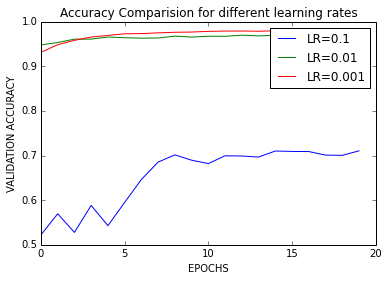

In [61]:
#Accuracy plot for different learning rates in Adam optimizer
pylab.plot(learning_csv_1['epoch'],learning_csv_1['val_acc'],label = 'LR=0.1')
pylab.plot(learning_csv_2['epoch'], learning_csv_2['val_acc'],label = 'LR=0.01')
pylab.plot(learning_csv_3['epoch'],learning_csv_3['val_acc'],label = 'LR=0.001')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("EPOCHS")
pylab.ylabel("VALIDATION ACCURACY")
plt.title('Accuracy Comparision for different learning rates')
pylab.savefig("LearningRates_Accuracy")
pylab.show()

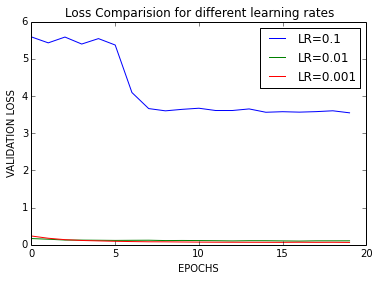

In [62]:
#Loss plot for different learning rates in Adam optimizer
pylab.plot(learning_csv_1['epoch'],learning_csv_1['val_loss'],label = 'LR=0.1')
pylab.plot(learning_csv_2['epoch'], learning_csv_2['val_loss'],label = 'LR=0.01')
pylab.plot(learning_csv_3['epoch'],learning_csv_3['val_loss'],label = 'LR=0.001')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("EPOCHS")
pylab.ylabel("VALIDATION LOSS")
plt.title('Loss Comparision for different learning rates')
pylab.savefig("LearningRates_Loss")
pylab.show()

In [29]:
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [56]:
#Adam optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_adam.csv')
model_checkpoint = ModelCheckpoint('model_adam.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0324 - acc: 0.9912 - val_loss: 0.0784 - val_acc: 0.9824

Epoch 00001: val_loss improved from inf to 0.07837, saving model to model_adam.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0311 - acc: 0.9912 - val_loss: 0.0749 - val_acc: 0.9824

Epoch 00002: val_loss improved from 0.07837 to 0.07493, saving model to model_adam.hdf5
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0278 - acc: 0.9922 - val_loss: 0.0755 - val_acc: 0.9822

Epoch 00003: val_loss did not improve
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0267 - acc: 0.9922 - val_loss: 0.0820 - val_acc: 0.9808

Epoch 00004: val_loss did not improve
Epoch 5/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0278 - acc: 0.9917 - val_loss: 0.0801 - val_acc: 0.9811

Epoch 0

In [30]:
#SGD optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_sgd.csv')
model_checkpoint = ModelCheckpoint('model_sgd.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/step - loss: 2.3548 - acc: 0.1677 - val_loss: 1.8710 - val_acc: 0.5400

Epoch 00001: val_loss improved from inf to 1.87096, saving model to model_sgd.hdf5
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 1.9393 - acc: 0.3208 - val_loss: 1.5521 - val_acc: 0.6881

Epoch 00002: val_loss improved from 1.87096 to 1.55209, saving model to model_sgd.hdf5
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 1.6651 - acc: 0.4488 - val_loss: 1.3287 - val_acc: 0.7511

Epoch 00003: val_loss improved from 1.55209 to 1.32875, saving model to model_sgd.hdf5
Epoch 4/20
60000/60000 [==============================] - 5s 89us/step - loss: 1.4690 - acc: 0.5350 - val_loss: 1.1685 - val_acc: 0.7829

Epoch 00004: val_loss improved from 1.32875 to 1.16845, saving model to model_sgd.hdf5
Epoch 5/20
60000/60000 [==============================

In [33]:
#Adagrad optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adagrad(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_adagrad.csv')
model_checkpoint = ModelCheckpoint('model_adagrad.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.5260 - acc: 0.8484 - val_loss: 0.3745 - val_acc: 0.9029

Epoch 00001: val_loss improved from inf to 0.37454, saving model to model_adagrad.hdf5
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.4498 - acc: 0.8700 - val_loss: 0.3457 - val_acc: 0.9085

Epoch 00002: val_loss improved from 0.37454 to 0.34575, saving model to model_adagrad.hdf5
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.4243 - acc: 0.8785 - val_loss: 0.3300 - val_acc: 0.9113

Epoch 00003: val_loss improved from 0.34575 to 0.32998, saving model to model_adagrad.hdf5
Epoch 4/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.4076 - acc: 0.8824 - val_loss: 0.3194 - val_acc: 0.9140

Epoch 00004: val_loss improved from 0.32998 to 0.31945, saving model to model_adagrad.hdf5
Epoch 5/20
60000/60000 [===========

In [57]:
adam_csv = pd.read_csv('model_adam.csv')
adam_csv

,epoch,acc,loss,val_acc,val_loss
0,0,0.991217,0.032430,0.9824,0.078373
1,1,0.991217,0.031078,0.9824,0.074932
2,2,0.992167,0.027779,0.9822,0.075456
3,3,0.992183,0.026688,0.9808,0.082008
4,4,0.991717,0.027781,0.9811,0.080123
5,5,0.992067,0.027017,0.9820,0.078500
6,6,0.992733,0.025387,0.9817,0.078289
7,7,0.992300,0.024644,0.9824,0.077922
8,8,0.992283,0.025568,0.9818,0.077157
9,9,0.993033,0.023599,0.9809,0.078194


In [58]:
sgd_csv = pd.read_csv('model_sgd.csv')
sgd_csv

,epoch,acc,loss,val_acc,val_loss
0,0,0.167700,2.354844,0.5400,1.870962
1,1,0.320783,1.939295,0.6881,1.552092
2,2,0.448750,1.665065,0.7511,1.328745
3,3,0.534983,1.468954,0.7829,1.168453
4,4,0.595867,1.318104,0.8023,1.050614
5,5,0.639750,1.204709,0.8149,0.960690
6,6,0.666517,1.121141,0.8230,0.889976
7,7,0.691550,1.046626,0.8302,0.833127
8,8,0.709950,0.990843,0.8363,0.786362
9,9,0.726467,0.943777,0.8423,0.747368


In [59]:
adagrad_csv = pd.read_csv('model_adagrad.csv')
adagrad_csv

,epoch,acc,loss,val_acc,val_loss
0,0,0.848350,0.525966,0.9029,0.374544
1,1,0.869983,0.449826,0.9085,0.345746
2,2,0.878533,0.424263,0.9113,0.329977
3,3,0.882450,0.407588,0.9140,0.319449
4,4,0.887100,0.393437,0.9154,0.310846
5,5,0.889350,0.382343,0.9159,0.303930
6,6,0.890867,0.376534,0.9177,0.298079
7,7,0.893767,0.369030,0.9189,0.293132
8,8,0.895817,0.360582,0.9195,0.288844
9,9,0.896367,0.355631,0.9207,0.285373


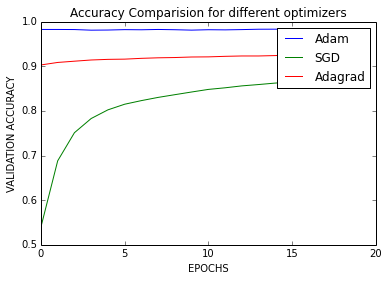

In [63]:
#Accuracy plot for different optimizers
pylab.plot(adam_csv['epoch'],adam_csv['val_acc'],label = 'Adam')
pylab.plot(sgd_csv['epoch'], sgd_csv['val_acc'],label = 'SGD')
pylab.plot(adagrad_csv['epoch'],adagrad_csv['val_acc'],label = 'Adagrad')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("EPOCHS")
pylab.ylabel("VALIDATION ACCURACY")
plt.title('Accuracy Comparision for different optimizers')
pylab.savefig("Optimizers_Accuracy")
pylab.show()

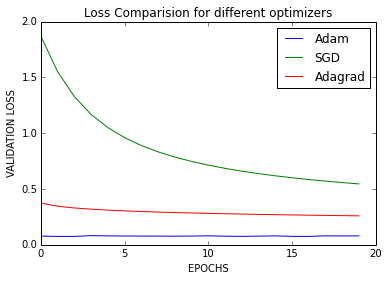

In [64]:
#Loss plot for different optimizers
pylab.plot(adam_csv['epoch'],adam_csv['val_loss'],label = 'Adam')
pylab.plot(sgd_csv['epoch'], sgd_csv['val_loss'],label = 'SGD')
pylab.plot(adagrad_csv['epoch'],adagrad_csv['val_loss'],label = 'Adagrad')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("EPOCHS")
pylab.ylabel("VALIDATION LOSS")
plt.title('Loss Comparision for different optimizers')
pylab.savefig("Optimizers_Loss")
pylab.show()

In [35]:
#Loss function = Categorical Crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_categorical_crossentropy.csv')
model_checkpoint = ModelCheckpoint('model_categorical_crossentropy.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.2731 - acc: 0.9199 - val_loss: 0.1711 - val_acc: 0.9497

Epoch 00001: val_loss improved from inf to 0.17110, saving model to model_categorical_crossentropy.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.1928 - acc: 0.9440 - val_loss: 0.1374 - val_acc: 0.9593

Epoch 00002: val_loss improved from 0.17110 to 0.13737, saving model to model_categorical_crossentropy.hdf5
Epoch 3/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.1592 - acc: 0.9537 - val_loss: 0.1116 - val_acc: 0.9671

Epoch 00003: val_loss improved from 0.13737 to 0.11157, saving model to model_categorical_crossentropy.hdf5
Epoch 4/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1349 - acc: 0.9604 - val_loss: 0.1012 - val_acc: 0.9705

Epoch 00004: val_loss improved from 0.11157 to 0.10124, saving model to mo

In [36]:
#Loss function = Mean Squared Error
model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_mean_squared_error.csv')
model_checkpoint = ModelCheckpoint('model_mean_squared_error.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0026 - acc: 0.9832 - val_loss: 0.0031 - val_acc: 0.9797

Epoch 00001: val_loss improved from inf to 0.00314, saving model to model_mean_squared_error.hdf5
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0025 - acc: 0.9836 - val_loss: 0.0030 - val_acc: 0.9808

Epoch 00002: val_loss improved from 0.00314 to 0.00302, saving model to model_mean_squared_error.hdf5
Epoch 3/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0025 - acc: 0.9846 - val_loss: 0.0029 - val_acc: 0.9808

Epoch 00003: val_loss improved from 0.00302 to 0.00290, saving model to model_mean_squared_error.hdf5
Epoch 4/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0024 - acc: 0.9846 - val_loss: 0.0029 - val_acc: 0.9817

Epoch 00004: val_loss improved from 0.00290 to 0.00288, saving model to model_mean_squared_e

In [37]:
#Loss function = Mean Absolute Error
model.compile(loss='mean_absolute_error',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_mean_absolute_error.csv')
model_checkpoint = ModelCheckpoint('model_mean_absolute_error.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0036 - acc: 0.9889 - val_loss: 0.0044 - val_acc: 0.9815

Epoch 00001: val_loss improved from inf to 0.00442, saving model to model_mean_absolute_error.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0034 - acc: 0.9891 - val_loss: 0.0043 - val_acc: 0.9816

Epoch 00002: val_loss improved from 0.00442 to 0.00427, saving model to model_mean_absolute_error.hdf5
Epoch 3/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0033 - acc: 0.9888 - val_loss: 0.0043 - val_acc: 0.9814

Epoch 00003: val_loss did not improve
Epoch 4/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0032 - acc: 0.9889 - val_loss: 0.0042 - val_acc: 0.9817

Epoch 00004: val_loss improved from 0.00427 to 0.00416, saving model to model_mean_absolute_error.hdf5
Epoch 5/20
60000/60000 [===========================

In [75]:
#Loss function = Mean Squared Logarithmic Error
model.compile(loss='mean_squared_logarithmic_error',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_mean_squared_logarithmic_error.csv')
model_checkpoint = ModelCheckpoint('model_mean_squared_logarithmic_error.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 5.5805e-04 - acc: 0.9925 - val_loss: 0.0013 - val_acc: 0.9827

Epoch 00001: val_loss improved from inf to 0.00134, saving model to model_mean_squared_logarithmic_error.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 118us/step - loss: 5.6697e-04 - acc: 0.9925 - val_loss: 0.0014 - val_acc: 0.9827

Epoch 00002: val_loss did not improve
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 5.5991e-04 - acc: 0.9924 - val_loss: 0.0014 - val_acc: 0.9815

Epoch 00003: val_loss did not improve
Epoch 4/20
60000/60000 [==============================] - 7s 121us/step - loss: 5.7233e-04 - acc: 0.9924 - val_loss: 0.0014 - val_acc: 0.9816

Epoch 00004: val_loss did not improve
Epoch 5/20
60000/60000 [==============================] - 7s 121us/step - loss: 5.6412e-04 - acc: 0.9926 - val_loss: 0.0014 - val_acc: 0.9822

Epoch 00005

In [70]:
cc_csv = pd.read_csv('model_categorical_crossentropy.csv')
cc_csv

,epoch,acc,loss,val_acc,val_loss
0,0,0.919867,0.273137,0.9497,0.171098
1,1,0.943967,0.192817,0.9593,0.137372
2,2,0.953733,0.159217,0.9671,0.111573
3,3,0.960433,0.134903,0.9705,0.101243
4,4,0.965050,0.119946,0.9739,0.086968
5,5,0.967600,0.108318,0.9748,0.084028
6,6,0.971417,0.098276,0.9749,0.079159
7,7,0.971667,0.093474,0.9767,0.077398
8,8,0.974317,0.085467,0.9761,0.074608
9,9,0.975700,0.080952,0.9794,0.069811


In [71]:
mse_csv = pd.read_csv('model_mean_squared_error.csv')
mse_csv

,epoch,acc,loss,val_acc,val_loss
0,0,0.983150,0.002602,0.9797,0.003139
1,1,0.983617,0.002486,0.9808,0.003022
2,2,0.984617,0.002457,0.9808,0.002895
3,3,0.984567,0.002370,0.9817,0.002878
4,4,0.985250,0.002342,0.9827,0.002777
5,5,0.985400,0.002300,0.9811,0.002910
6,6,0.985350,0.002309,0.9825,0.002761
7,7,0.985817,0.002198,0.9819,0.002836
8,8,0.986267,0.002172,0.9823,0.002762
9,9,0.987067,0.002039,0.9823,0.002769


In [72]:
mae_csv = pd.read_csv('model_mean_absolute_error.csv')
mae_csv

,epoch,acc,loss,val_acc,val_loss
0,0,0.988950,0.003616,0.9815,0.004421
1,1,0.989150,0.003408,0.9816,0.004273
2,2,0.988817,0.003272,0.9814,0.004350
3,3,0.988933,0.003182,0.9817,0.004161
4,4,0.990017,0.003005,0.9820,0.004231
5,5,0.989450,0.003087,0.9816,0.004234
6,6,0.990150,0.002870,0.9823,0.004123
7,7,0.989600,0.003021,0.9811,0.004242
8,8,0.989683,0.002879,0.9809,0.004156
9,9,0.990250,0.002765,0.9811,0.004188


In [76]:
msle_csv = pd.read_csv('model_mean_squared_logarithmic_error.csv')
msle_csv

,epoch,acc,loss,val_acc,val_loss
0,0,0.992450,0.000558,0.9827,0.001344
1,1,0.992500,0.000567,0.9827,0.001354
2,2,0.992450,0.000560,0.9815,0.001445
3,3,0.992450,0.000572,0.9816,0.001392
4,4,0.992583,0.000564,0.9822,0.001374
5,5,0.993017,0.000534,0.9825,0.001341
6,6,0.992400,0.000580,0.9815,0.001402
7,7,0.992500,0.000565,0.9827,0.001408
8,8,0.992983,0.000542,0.9814,0.001450
9,9,0.992767,0.000555,0.9828,0.001344


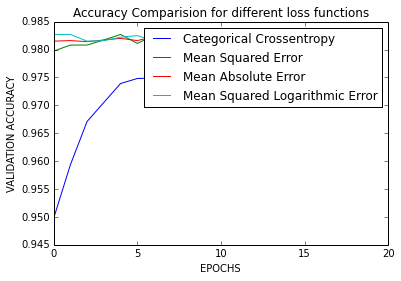

In [77]:
#Accuracy plot for different loss functions
pylab.plot(cc_csv['epoch'],cc_csv['val_acc'],label = 'Categorical Crossentropy')
pylab.plot(mse_csv['epoch'], mse_csv['val_acc'],label = 'Mean Squared Error')
pylab.plot(mae_csv['epoch'],mae_csv['val_acc'],label = 'Mean Absolute Error')
pylab.plot(msle_csv['epoch'],msle_csv['val_acc'],label = 'Mean Squared Logarithmic Error')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("EPOCHS")
pylab.ylabel("VALIDATION ACCURACY")
plt.title('Accuracy Comparision for different loss functions')
pylab.savefig("LossFunctions_Accuracy")
pylab.show()

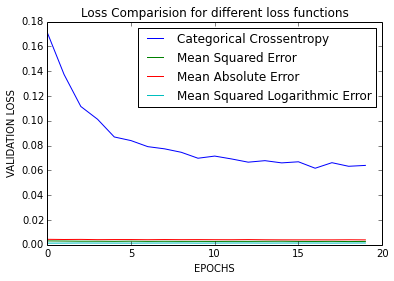

In [78]:
#Loss plot for different loss functions
pylab.plot(cc_csv['epoch'],cc_csv['val_loss'],label = 'Categorical Crossentropy')
pylab.plot(mse_csv['epoch'], mse_csv['val_loss'],label = 'Mean Squared Error')
pylab.plot(mae_csv['epoch'],mae_csv['val_loss'],label = 'Mean Absolute Error')
pylab.plot(msle_csv['epoch'],msle_csv['val_loss'],label = 'Mean Squared Logarithmic Error')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("EPOCHS")
pylab.ylabel("VALIDATION LOSS")
plt.title('Loss Comparision for different loss functions')
pylab.savefig("LossFunctions_Loss")
pylab.show()

In [11]:
#Number of neurons = 256
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:

model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_256.csv')
model_checkpoint = ModelCheckpoint('model_256.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0208 - acc: 0.8613 - val_loss: 0.0103 - val_acc: 0.9348

Epoch 00001: val_loss improved from inf to 0.01027, saving model to model_256.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0111 - acc: 0.9301 - val_loss: 0.0078 - val_acc: 0.9502

Epoch 00002: val_loss improved from 0.01027 to 0.00778, saving model to model_256.hdf5
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0086 - acc: 0.9460 - val_loss: 0.0065 - val_acc: 0.9576

Epoch 00003: val_loss improved from 0.00778 to 0.00646, saving model to model_256.hdf5
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0073 - acc: 0.9539 - val_loss: 0.0056 - val_acc: 0.9633

Epoch 00004: val_loss improved from 0.00646 to 0.00555, saving model to model_256.hdf5
Epoch 5/20
60000/60000 [==========================

In [13]:
#Number of neurons = 512
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_512.csv')
model_checkpoint = ModelCheckpoint('model_512.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.0181 - acc: 0.8777 - val_loss: 0.0094 - val_acc: 0.9414

Epoch 00001: val_loss improved from inf to 0.00943, saving model to model_512.hdf5
Epoch 2/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0096 - acc: 0.9391 - val_loss: 0.0068 - val_acc: 0.9561

Epoch 00002: val_loss improved from 0.00943 to 0.00685, saving model to model_512.hdf5
Epoch 3/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.0072 - acc: 0.9548 - val_loss: 0.0056 - val_acc: 0.9630

Epoch 00003: val_loss improved from 0.00685 to 0.00563, saving model to model_512.hdf5
Epoch 4/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.0060 - acc: 0.9621 - val_loss: 0.0047 - val_acc: 0.9698

Epoch 00004: val_loss improved from 0.00563 to 0.00472, saving model to model_512.hdf5
Epoch 5/20
60000/60000 [======================

In [14]:
#Number of neurons = 1024
model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_1024.csv')
model_checkpoint = ModelCheckpoint('model_1024.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 482us/step - loss: 0.0165 - acc: 0.8878 - val_loss: 0.0087 - val_acc: 0.9450

Epoch 00001: val_loss improved from inf to 0.00871, saving model to model_1024.hdf5
Epoch 2/20
60000/60000 [==============================] - 28s 468us/step - loss: 0.0087 - acc: 0.9442 - val_loss: 0.0063 - val_acc: 0.9603

Epoch 00002: val_loss improved from 0.00871 to 0.00628, saving model to model_1024.hdf5
Epoch 3/20
60000/60000 [==============================] - 30s 502us/step - loss: 0.0064 - acc: 0.9600 - val_loss: 0.0052 - val_acc: 0.9668

Epoch 00003: val_loss improved from 0.00628 to 0.00516, saving model to model_1024.hdf5
Epoch 4/20
60000/60000 [==============================] - 30s 506us/step - loss: 0.0051 - acc: 0.9686 - val_loss: 0.0045 - val_acc: 0.9712

Epoch 00004: val_loss improved from 0.00516 to 0.00446, saving model to model_1024.hdf5
Epoch 5/20
60000/60000 [==================

In [15]:
csv_256 = pd.read_csv('model_256.csv')
csv_256

,epoch,acc,loss,val_acc,val_loss
0,0,0.861283,0.020796,0.9348,0.010267
1,1,0.930067,0.011094,0.9502,0.007781
2,2,0.945967,0.008612,0.9576,0.006459
3,3,0.953850,0.007329,0.9633,0.005555
4,4,0.960350,0.006521,0.9683,0.004975
5,5,0.963933,0.005784,0.9690,0.004758
6,6,0.966933,0.005413,0.9737,0.004249
7,7,0.970133,0.004899,0.9735,0.004149
8,8,0.970767,0.004692,0.9750,0.003919
9,9,0.972950,0.004450,0.9737,0.003866


In [16]:
csv_512 = pd.read_csv('model_512.csv')
csv_512

,epoch,acc,loss,val_acc,val_loss
0,0,0.877700,0.018133,0.9414,0.009432
1,1,0.939133,0.009567,0.9561,0.006846
2,2,0.954800,0.007249,0.9630,0.005631
3,3,0.962133,0.006027,0.9698,0.004716
4,4,0.968033,0.005111,0.9718,0.004464
5,5,0.972383,0.004510,0.9749,0.003953
6,6,0.974517,0.004124,0.9750,0.003883
7,7,0.977200,0.003726,0.9791,0.003349
8,8,0.978833,0.003450,0.9787,0.003348
9,9,0.980733,0.003104,0.9770,0.003437


In [17]:
csv_1024 = pd.read_csv('model_1024.csv')
csv_1024

,epoch,acc,loss,val_acc,val_loss
0,0,0.887800,0.016493,0.9450,0.008706
1,1,0.944233,0.008711,0.9603,0.006281
2,2,0.960033,0.006384,0.9668,0.005156
3,3,0.968617,0.005113,0.9712,0.004459
4,4,0.972917,0.004390,0.9721,0.004179
5,5,0.977000,0.003739,0.9763,0.003625
6,6,0.979650,0.003335,0.9776,0.003300
7,7,0.981283,0.003080,0.9773,0.003388
8,8,0.982167,0.002862,0.9800,0.003053
9,9,0.984200,0.002559,0.9808,0.002837


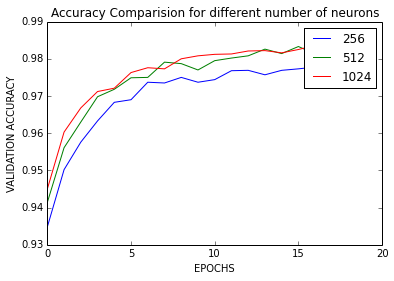

In [19]:
#Accuracy plot for different number of hidden neurons
pylab.plot(csv_256['epoch'],csv_256['val_acc'],label = '256')
pylab.plot(csv_512['epoch'], csv_512['val_acc'],label = '512')
pylab.plot(csv_1024['epoch'],csv_1024['val_acc'],label = '1024')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("EPOCHS")
pylab.ylabel("VALIDATION ACCURACY")
plt.title('Accuracy Comparision for different number of neurons')
pylab.savefig("Neurons_Accuracy")
pylab.show()

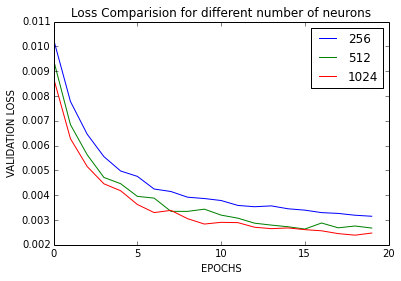

In [20]:
#Loss plot for different number of hidden neurons
pylab.plot(csv_256['epoch'],csv_256['val_loss'],label = '256')
pylab.plot(csv_512['epoch'], csv_512['val_loss'],label = '512')
pylab.plot(csv_1024['epoch'],csv_1024['val_loss'],label = '1024')
figure = pylab.legend(loc = 'upper right')
pylab.xlabel("EPOCHS")
pylab.ylabel("VALIDATION LOSS")
plt.title('Loss Comparision for different number of neurons')
pylab.savefig("Neurons_Loss")
pylab.show()

In [23]:
model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

csv_logger = CSVLogger('model_final.csv')
model_checkpoint = ModelCheckpoint('model_final.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)

history = model.fit(X_train, Y_train,
                    batch_size = batch_size, nb_epoch = num_epochs,
                    verbose = 1, validation_data = (X_test, Y_test),callbacks = [csv_logger, model_checkpoint])

/usr/local/lib/python3.4/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 363us/step - loss: 0.0165 - acc: 0.8871 - val_loss: 0.0088 - val_acc: 0.9439

Epoch 00001: val_loss improved from inf to 0.00880, saving model to model_final.hdf5
Epoch 2/20
60000/60000 [==============================] - 21s 353us/step - loss: 0.0086 - acc: 0.9445 - val_loss: 0.0062 - val_acc: 0.9588

Epoch 00002: val_loss improved from 0.00880 to 0.00620, saving model to model_final.hdf5
Epoch 3/20
60000/60000 [==============================] - 23s 378us/step - loss: 0.0063 - acc: 0.9602 - val_loss: 0.0051 - val_acc: 0.9675

Epoch 00003: val_loss improved from 0.00620 to 0.00507, saving model to model_final.hdf5
Epoch 4/20
60000/60000 [==============================] - 23s 380us/step - loss: 0.0051 - acc: 0.9676 - val_loss: 0.0044 - val_acc: 0.9714

Epoch 00004: val_loss improved from 0.00507 to 0.00444, saving model to model_final.hdf5
Epoch 5/20
60000/60000 [==============

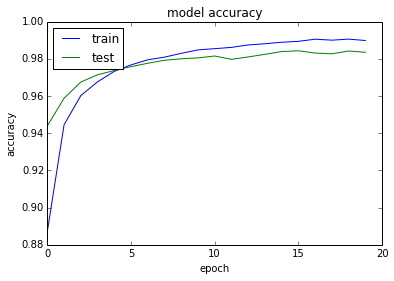

In [24]:
'''FinalModel
Optimizer - Adam
Learning Rate - 0.001
Number of hidden layer neurons - 1024
Loss function - Mean Squared Error
Activation - Sigmoid
'''
#Accuracy Summary
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('FinalModel_Accuracy')
plt.show()

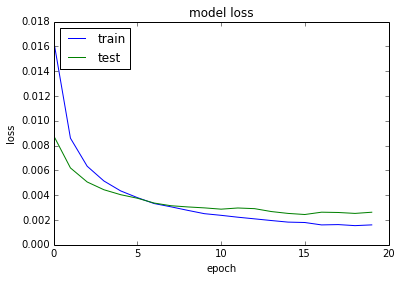

In [25]:
#Loss Summary
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('FinalModel_Loss')
plt.show()